In [1]:
import sys
import os
os.chdir('../..')
sys.path.append(os.getcwd())

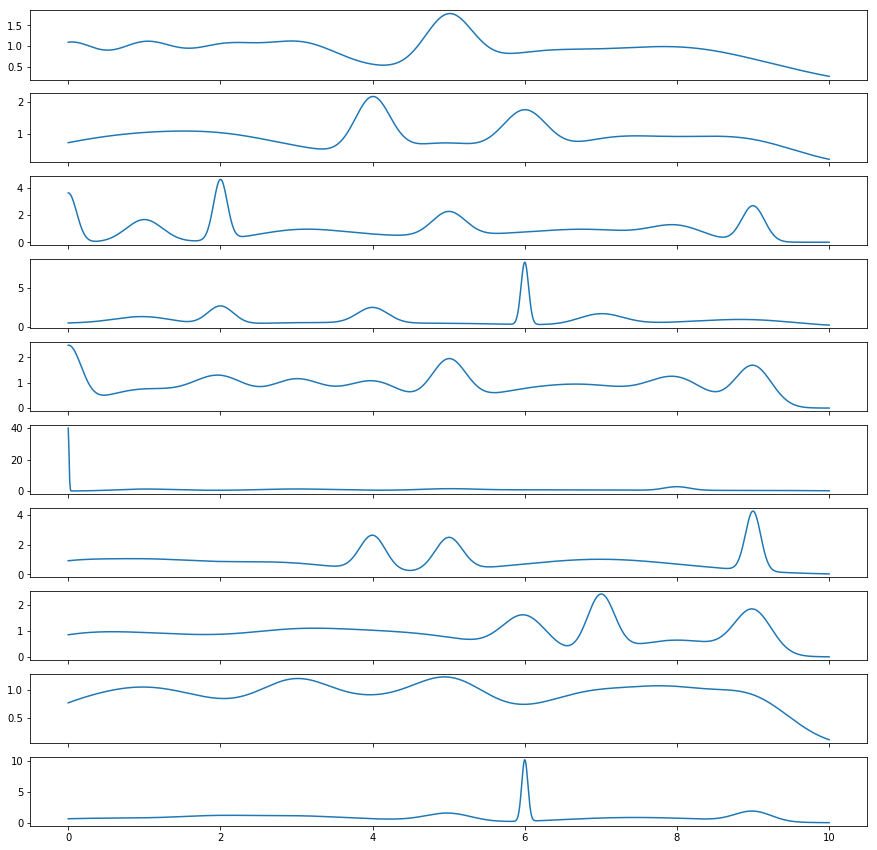

In [2]:
'''
Created on Nov 13, 2018

@author: lucafavalli
'''
%matplotlib inline

from scipy.stats import norm
import matplotlib.pyplot as plt
from serialization import csv_network
import numpy as np

node_list = csv_network.read_nodes_from_csv("./test/csv/net_csv_data/4c2ccdd17248034f07f5bde198607d612d6f261d")
rng = len(node_list)
fig, axis = plt.subplots(rng, figsize=(15,15), sharex = True)
x = np.linspace(0, rng, 1000)
for i in range(rng):
    y = np.sum([norm.pdf(x, j, edge) for j, edge in enumerate(node_list[i].edges)], axis=0)
    axis[i].plot(x, y)

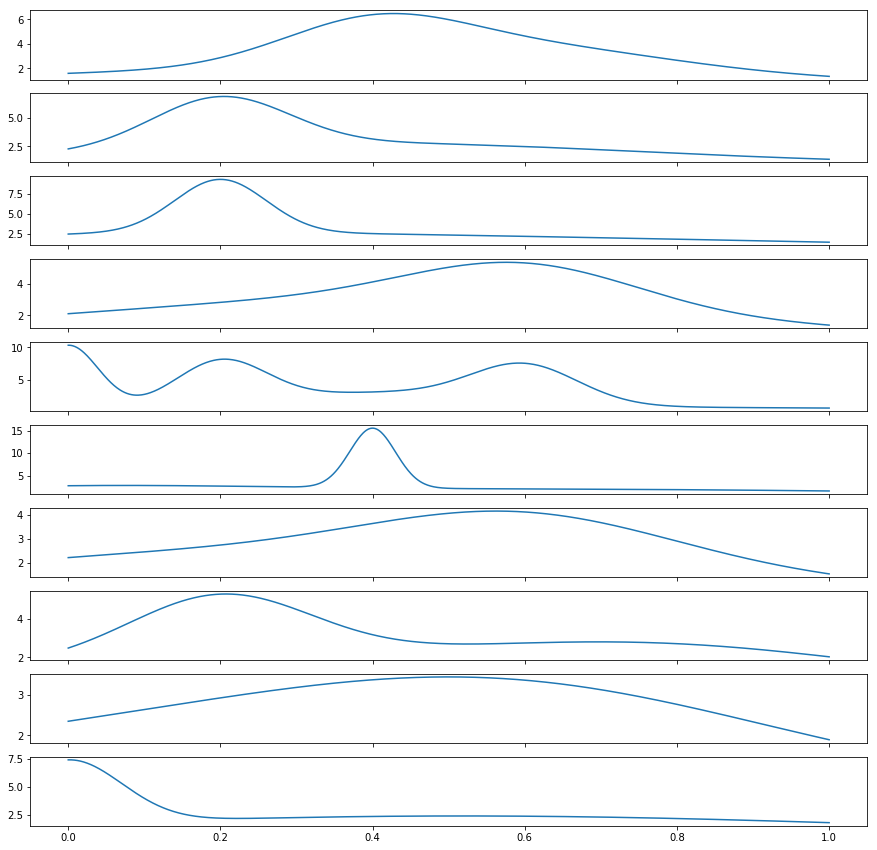

In [3]:
'''
Created on Nov 13, 2018

@author: lucafavalli
'''
%matplotlib inline

from scipy.stats import norm
import matplotlib.pyplot as plt
from serialization import csv_network
import numpy as np

node_list = csv_network.read_nodes_from_csv("./test/csv/net_csv_data/4c2ccdd17248034f07f5bde198607d612d6f261d")
rng = len(node_list[0].parameters)
fig, axis = plt.subplots(len(node_list), figsize=(15,15), sharex = True)
x = np.linspace(0, 1, 1000)
for i in range(len(node_list)):
    y = np.sum([norm.pdf(x, j/rng, parameter) for j, parameter in enumerate(node_list[i].parameters)], axis=0)
    axis[i].plot(x, y)
    '''
    Idea: sommare ulteriormente la somma di gaussiane così ottenute con i valori delle analisi nell'intervallo [0;1]
    in modo da creare dei picchi di probabilità nelle corrispondenze
    '''

427
0.4274274274274274


206
0.2062062062062062


197
0.1971971971971972


57
0.057057057057057055


208
0.2082082082082082


400
0.40040040040040037


608
0.6086086086086087


185
0.18518518518518517


54
0.05405405405405406


17
0.017017017017017015




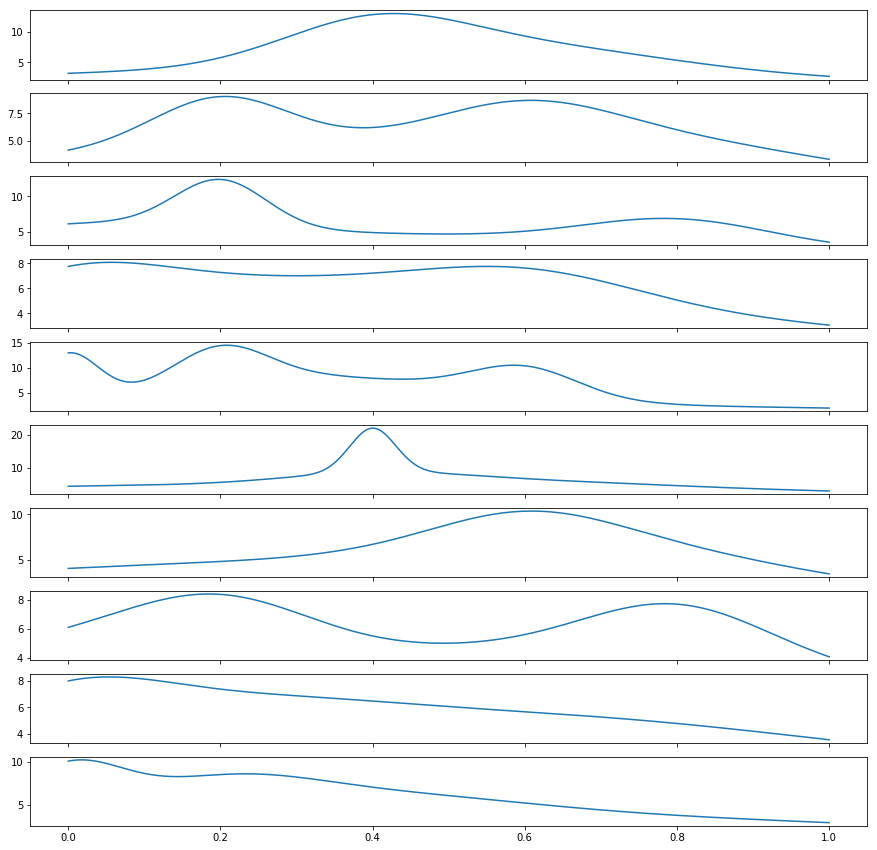

In [4]:
'''
Created on Nov 13, 2018

@author: lucafavalli
'''
%matplotlib inline

from scipy.stats import norm
import matplotlib.pyplot as plt
from serialization import csv_network
import numpy as np

node_list = csv_network.read_nodes_from_csv("./test/csv/net_csv_data/4c2ccdd17248034f07f5bde198607d612d6f261d")
rng = len(node_list[0].parameters)
fig, axis = plt.subplots(len(node_list), figsize=(15,15), sharex = True)
x = np.linspace(0, 1, 1000)
for i in range(len(node_list)):
    y = np.sum([norm.pdf(x, j/rng, parameter) for j, parameter in enumerate(node_list[i].parameters)], axis=0)
    #L'input viene ruotato in modo che ogni facility dia più influenza a un parametro diverso
    input_data = np.sum([norm.pdf(x, j/rng, parameter) for j, parameter in enumerate(np.roll(node_list[0].parameters, i))], axis=0)
    ny = np.sum([input_data, y], axis=0)
    axis[i].plot(x, ny)
    print(np.argmax(ny))
    print(x[np.argmax(ny)])
    print()
    print()

0.3989222938339326


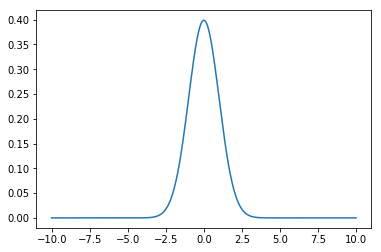

In [9]:
x = np.linspace(-10, 10, 1000)
y = norm.pdf(x)
plt.plot(x,y)
print(np.max(y))
print 

0.3324403339453602


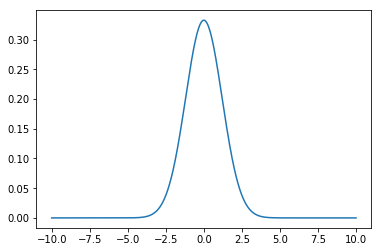

In [21]:
x = np.linspace(-10, 10, 1000)
y = norm.pdf(x, 0, 1 + 0.2)
plt.plot(x,y)
print(np.max(y))

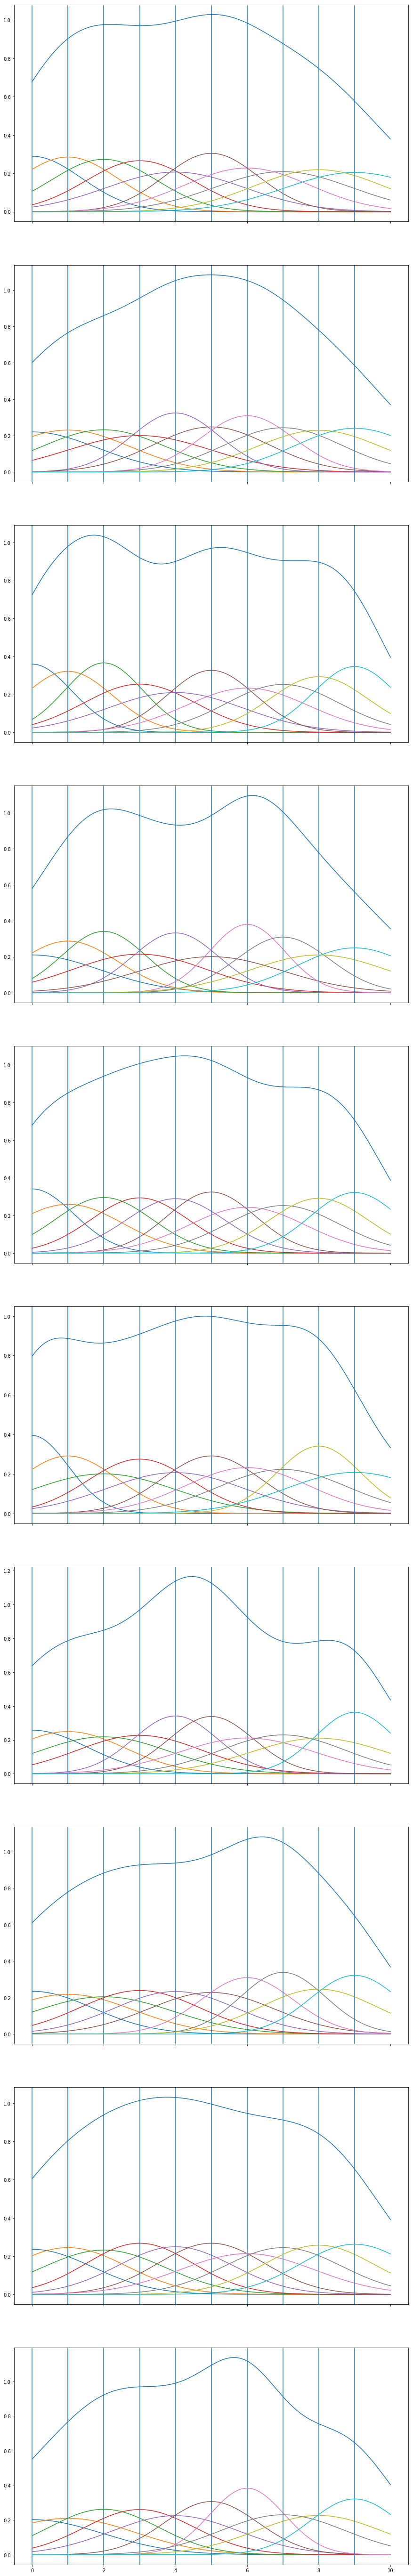

In [29]:
'''
Created on Nov 13, 2018

@author: lucafavalli
'''
%matplotlib inline

from scipy.stats import norm
import matplotlib.pyplot as plt
from serialization import csv_network
import numpy as np

node_list = csv_network.read_nodes_from_csv("./test/csv/net_csv_data/4c2ccdd17248034f07f5bde198607d612d6f261d")
rng = len(node_list[0].edges)
fig, axis = plt.subplots(len(node_list), figsize=(15,100), sharex = True)
x = np.linspace(0, rng, 1000 * rng)
for i in range(len(node_list)):
    y = np.sum([norm.pdf(x, j, 1+edge) for j, edge in enumerate(node_list[i].edges)], axis=0)
    for j in range(rng):
        axis[i].axvline(x=j)
        axis[i].plot(x, norm.pdf(x, j, 1+node_list[i].edges[j]))
    axis[i].plot(x, y)

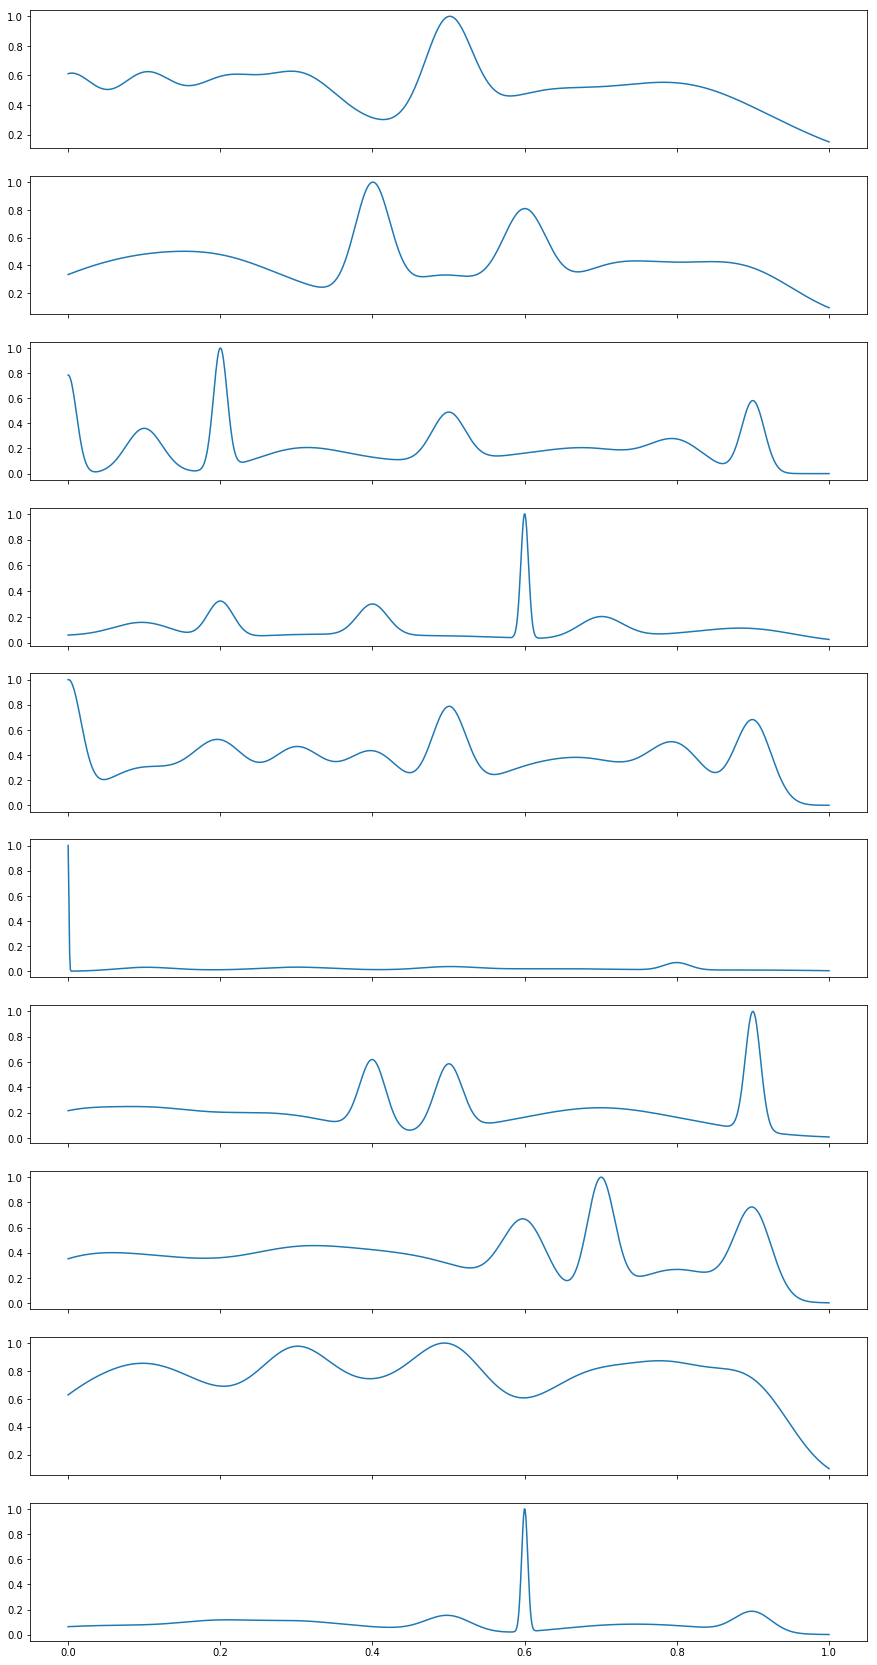

In [32]:
'''
Created on Nov 13, 2018

@author: lucafavalli
'''
%matplotlib inline

from scipy.stats import norm
import matplotlib.pyplot as plt
from serialization import csv_network
import numpy as np

node_list = csv_network.read_nodes_from_csv("./test/csv/net_csv_data/4c2ccdd17248034f07f5bde198607d612d6f261d")
rng = len(node_list)
edge_size = len(node_list[0].edges)
fig, axis = plt.subplots(rng, figsize=(15,30), sharex = True)
x = np.linspace(0, edge_size, 1000)
for i in range(rng):
    #y = np.sum([norm.pdf(x, j, edge)/np.max(norm.pdf(x, j, edge)) for j, edge in enumerate(node_list[i].edges)], axis=0)
    y = np.sum([norm.pdf(x, j, edge) for j, edge in enumerate(node_list[i].edges)], axis=0)
    y = y / np.max(y)
    x_fake = np.linspace(0, 1, 1000)
    axis[i].plot(x_fake, y)

In [45]:
def integral(y, xrange = 1):
    return np.sum( y * ( xrange / len(y) ) )

    def distance(x1, x2):
        return integral(np.abs(np.subtract(x1, x2)))

#L'integrale della differenza è sempre (per l'ambito considerato) un valore compreso tra 0 e 1

x = np.linspace(0, edge_size, 1000)
y0 = np.sum([norm.pdf(x, j, edge) for j, edge in enumerate(node_list[0].edges)], axis=0)
y1 = np.sum([norm.pdf(x, j, edge) for j, edge in enumerate(node_list[1].edges)], axis=0)
print(integral(y0))
print(integral(y1))
print(distance(y0, y1))
print(distance(y0, y0))
print(distance(y1, y1))
print(distance([0]*10, [1]*10))

0.9337131761472954
0.9337659156589628
0.29025991079353697
0.0
0.0
1.0


0.0
0.3684504852502414
0.6698753966492152
0.8318109505322856
0.35861007091544655
0.9983189334622524
0.6741116300397703
0.42973362156268047
0.4944006086121197
0.8735707480578524


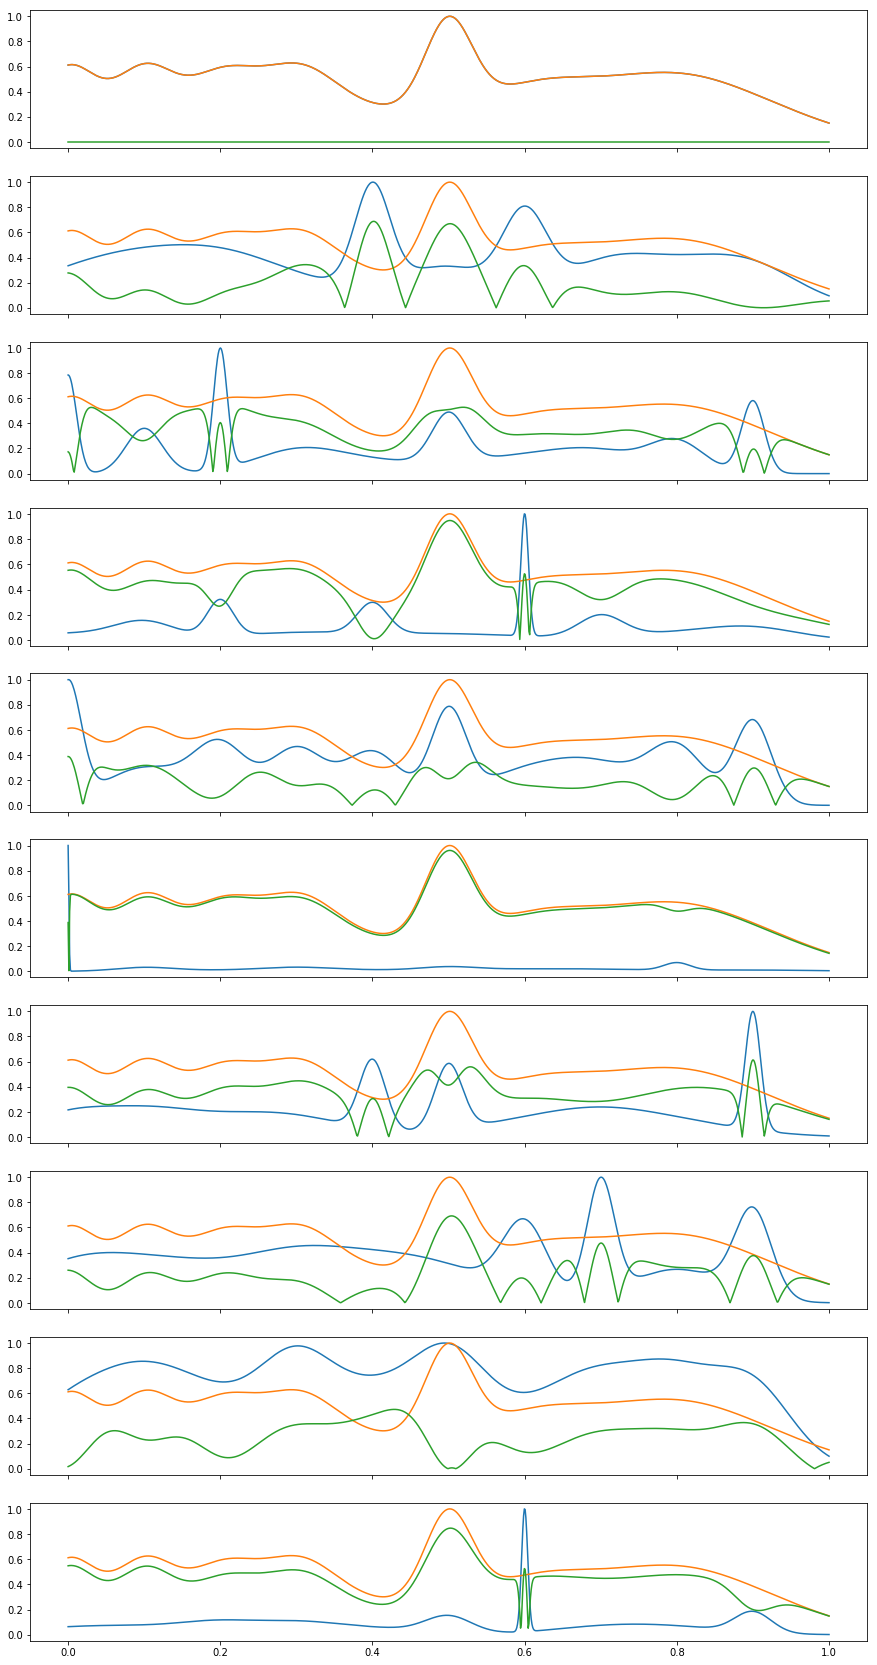

In [72]:
node_list = csv_network.read_nodes_from_csv("./test/csv/net_csv_data/4c2ccdd17248034f07f5bde198607d612d6f261d")
rng = len(node_list)
edge_size = len(node_list[0].edges)
fig, axis = plt.subplots(rng, figsize=(15,30), sharex = True)
x = np.linspace(0, edge_size, 1000)
y0 = np.sum([norm.pdf(x, j, edge) for j, edge in enumerate(node_list[0].edges)], axis=0)
y0 = y0 / np.max(y0)

for i in range(rng):
    #y = np.sum([norm.pdf(x, j, edge)/np.max(norm.pdf(x, j, edge)) for j, edge in enumerate(node_list[i].edges)], axis=0)
    y = np.sum([norm.pdf(x, j, edge) for j, edge in enumerate(node_list[i].edges)], axis=0)
    y = y / np.max(y)
    x_fake = np.linspace(0, 1, 1000)
    axis[i].plot(x_fake, y)
    axis[i].plot(x_fake, y0)
    axis[i].plot(x_fake, np.abs(np.subtract(y, y0)))
    print(2 * distance(y, y0))